In [3]:
import pickle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [6]:
with open('roc_data_rbf.pkl', 'rb') as f:
    roc_data_rbf = pickle.load(f)

fpr_rbf = roc_data_rbf['fpr_rbf']
tpr_rbf = roc_data_rbf['tpr_rbf']

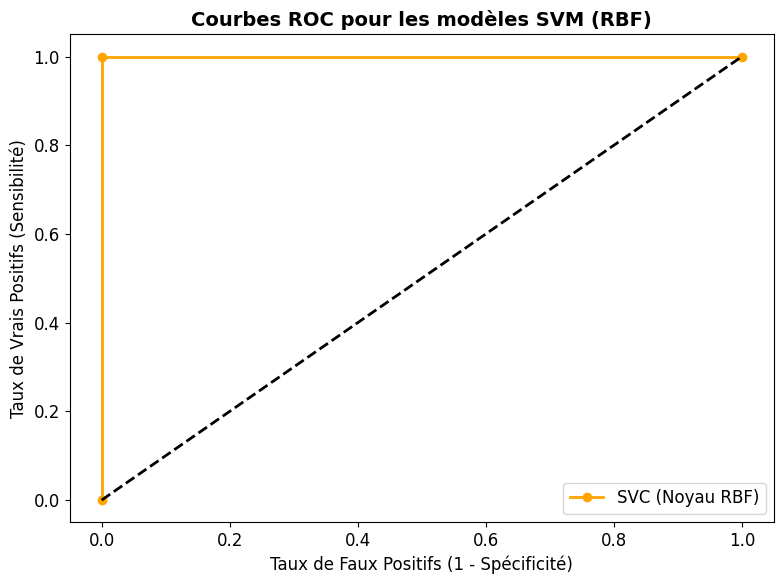

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rbf, tpr_rbf, label='SVC (Noyau RBF)', linewidth=2, marker='o', markersize=6, markerfacecolor='orange', color='orange')

# Tracer la ligne diagonale (modèle aléatoire avec AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.rcParams['font.size'] = 12
plt.title('Courbes ROC pour les modèles SVM (RBF)', fontsize=14, fontweight='bold')

plt.xlabel('Taux de Faux Positifs (1 - Spécificité)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (Sensibilité)', fontsize=12)

plt.legend(loc='lower right', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()